In [0]:
import pandas as pd
import numpy as np 


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
tweets_df2 =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/TsiprasTweets080419.tsv", sep='\t')

In [0]:
L_tweets = tweets_df2.to_dict('records')

In [8]:
L_tweets[0]

{'Unnamed: 0': 0,
 'contributors': nan,
 'coordinates': nan,
 'created_at': 'Tue May 12 11:04:28 +0000 2020',
 'display_text_range': '[0, 265]',
 'entities': "{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/wI91ROOtuE', 'expanded_url': 'https://www.facebook.com/tsiprasalexis/photos/a.10150189504248054/10158468692953054', 'display_url': 'facebook.com/tsiprasalexis/…', 'indices': [242, 265]}]}",
 'extended_entities': nan,
 'favorite_count': 118,
 'favorited': False,
 'full_text': 'Η προσφορά των νοσηλευτών δεν μπορεί και δεν πρέπει να ξεχαστεί, γιατί είναι διαχρονική. Ισχύει και σήμερα εν μέσω πανδημίας, όπως ίσχυε και παλαιότερα, όταν Υπουργοί της ΝΔ απαξίωναν το έργο και την προσφορά τους στο δημόσιο σύστημα Υγείας. https://t.co/wI91ROOtuE',
 'geo': nan,
 'id': 1260163930158239744,
 'id_str': 1260163930158239744,
 'in_reply_to_screen_name': 'atsipras',
 'in_reply_to_status_id': 1.260163928979628e+18,
 'in_reply_to_status_id_str': 1.260163928979628e+1

In [0]:
L_short_tweets = []

for tweet in L_tweets:
    date = tweet['created_at']
    text = tweet['full_text']
    short_tweet = {'date': date, 'text':text, 'user': 'Tsipras'}
    L_short_tweets.append(short_tweet)

In [10]:
L_short_tweets[0:5]

[{'date': 'Tue May 12 11:04:28 +0000 2020',
  'text': 'Η προσφορά των νοσηλευτών δεν μπορεί και δεν πρέπει να ξεχαστεί, γιατί είναι διαχρονική. Ισχύει και σήμερα εν μέσω πανδημίας, όπως ίσχυε και παλαιότερα, όταν Υπουργοί της ΝΔ απαξίωναν το έργο και την προσφορά τους στο δημόσιο σύστημα Υγείας. https://t.co/wI91ROOtuE',
  'user': 'Tsipras'},
 {'date': 'Tue May 12 11:04:28 +0000 2020',
  'text': "Ένα ευχαριστώ όμως που θα μείνει μόνο στα λόγια, με αφορμή τη σημερινή ημέρα, είναι πολύ λίγο και πολύ υποκριτικό. Είναι υποχρέωση όλων μας και πάνω απ' όλα της κυβέρνησης, να περάσει από τα ωραία λόγια στις πράξεις.",
  'user': 'Tsipras'},
 {'date': 'Tue May 12 11:04:27 +0000 2020',
  'text': 'Σήμερα, Παγκόσμια Ημέρα Νοσηλευτή/-τριας, πολλοί θα σπεύσουν να ευχαριστήσουν το νοσηλευτικό προσωπικό που με αυτοθυσία εδώ και δύο μήνες δίνει αγώνα για να σώσει χιλιάδες ανθρώπινες ζωές.',
  'user': 'Tsipras'},
 {'date': 'Mon May 11 07:46:20 +0000 2020',
  'text': 'Στηρίζουμε τα καταστήματα της γειτον

In [0]:
short_tweets = pd.DataFrame(L_short_tweets)

In [12]:
short_tweets.tail()

,date,text,user
3241,Sun May 08 18:54:34 +0000 2016,Το σχέδιό μας ήταν να διεκδικήσουμε μια συμφων...,Tsipras
3242,Sun May 08 18:52:54 +0000 2016,Από τη μία έλεγαν ότι οδηγούμε τη χώρα στα βρά...,Tsipras
3243,Sun May 08 18:51:32 +0000 2016,"Η ομιλία του αρχηγού της ΝΔ, πράγματι χρίζει μ...",Tsipras
3244,Sun May 08 16:50:13 +0000 2016,"RT @PrimeministerGR: Παρακολουθήστε, σε λίγο, ...",Tsipras
3245,Sun May 08 16:50:06 +0000 2016,RT @PrimeministerGR: με την κοινωνική δικαιοσύ...,Tsipras


In [0]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')


In [0]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day


In [15]:
short_tweets.head()

,date,text,user,year,month,day
0,2020-05-12 11:04:28,Η προσφορά των νοσηλευτών δεν μπορεί και δεν π...,Tsipras,2020,5,12
1,2020-05-12 11:04:28,Ένα ευχαριστώ όμως που θα μείνει μόνο στα λόγι...,Tsipras,2020,5,12
2,2020-05-12 11:04:27,"Σήμερα, Παγκόσμια Ημέρα Νοσηλευτή/-τριας, πολλ...",Tsipras,2020,5,12
3,2020-05-11 07:46:20,Στηρίζουμε τα καταστήματα της γειτονιάς μας κα...,Tsipras,2020,5,11
4,2020-05-09 13:16:38,Τι θα γινόταν αν η κυβέρνηση ΣΥΡΙΖΑ αντιμετώπι...,Tsipras,2020,5,9


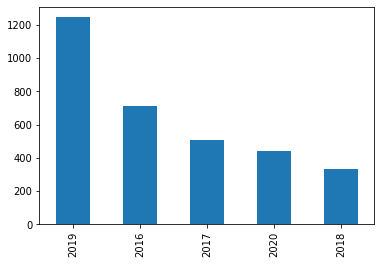

In [16]:
short_tweets['year'].value_counts().plot(kind='bar')

In [17]:
short_tweets[short_tweets['text'].str.contains("[τoα]{3,8}\s")].iloc[1].text

'Η διεύρυνση του χώρου για τα τραπεζοκαθίσματα πρέπει να προχωρήσει με σχέδιο αλλά δεν μπορεί να αποτελεί πανάκεια για τη μη στήριξη των επιχειρήσεων με ρευστότητα και με ελαφρύνσεις.'

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [19]:
stop_words_df = pd.read_csv("../../data/stopwords_el.txt", sep="\n", header = None)


FileNotFoundError: ignored

In [0]:
stop_words_df.head()

,0
0,ο
1,η
2,το
3,οι
4,τα


In [0]:
stop_words_df.columns =['words']

In [0]:
stop_words_df.tail()

,words
634,ΩΣΟΤΟΥ
635,ΩΣΠΟΥ
636,ΩΣΤΕ
637,ΩΣΤΟΣΟ
638,ΩΧ


In [0]:
stop_words_df['words'] = stop_words_df['words'].str.lower()

In [0]:
stop_words_df['words']

0             ο
1             η
2            το
3            οι
4            τα
5           του
6           της
7           των
8           τον
9           την
10         και 
11           κι
12            κ
13        ειμαι
14        εισαι
15        ειναι
16      ειμαστε
17        ειστε
18          στο
19         στον
20          στη
21         στην
22           μα
23         αλλα
24          απο
25          για
26         προς
27           με
28           σε
29           ως
         ...   
609     τουτοι 
610    τουτοις 
611     τουτον 
612     τουτος 
613     τουτου 
614    τουτους 
615     τουτων 
616      τυχον 
617        των 
618       τωρα 
619         υπ 
620         υπο
621      υποψη 
622     υποψιν 
623     υστερα 
624      φετος 
625     χαμηλα 
626       χθες 
627       χτες 
628       χωρις
629    χωριστα 
630       ψηλα 
631          ω 
632          ως
633        ωσαν
634     ωσοτου 
635      ωσπου 
636        ωστε
637      ωστοσο
638          ωχ
Name: words, Length: 639

In [0]:
short_tweets[short_tweets['year']==2019]['text']

0      Σήμερα στο Βελβεντό, το οποίο οι κάτοικοι με τ...
1      Όσο ο ΣΥΡΙΖΑ βρίσκεται στην κυβέρνηση δεν θα υ...
2      Δεν μας χαροποιεί το γεγονός ότι η Τουρκία παί...
3      Με το δόγμα της πολυδιάστατης-ενεργητικής εξωτ...
4      Το πολιτικό σκηνικό σήμερα αναδιατάσσεται. Η μ...
5      Η ιστορική αυτή εξέλιξη διαμορφώνει ένα νέο πλ...
6      Η αποπληρωμή τμήματος των δανείων του ΔΝΤ είνα...
7      Κάθε φορά που η αντιπολίτευση καλείται να απαν...
8      Άλλαξαν το όνομά της χώρας, έβγαλαν τους αλυτρ...
9      Το πρόβλημα με τους γείτονες ήταν ότι είχαν έν...
10     Οι αξίες του ΣΥΡΙΖΑ - Προοδευτική Συμμαχία είν...
11     Για να κερδίσουμε τη ψυχή και την καρδιά των α...
12     Τηρήσαμε τη δέσμευσή μας μειώνοντας κατά 10% τ...
13     Τον Σεπτέμβρη του 2015, είπαμε στον ελληνικό λ...
14     Απέναντί μας έχουμε τον συνασπισμό του παλιού,...
15     Έχουμε μπροστά μας έναν αγώνα όμορφο αλλά και ...
16     Έχουμε επιλέξει να δώσουμε τις μάχες στο πλάι ...
17     Δεν γυρίζουμε πίσω στην 

In [0]:
text = short_tweets['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')


In [0]:
text

0       Σημερα στο Βελβεντο, το οποιο οι κατοικοι με τ...
1       Όσο ο ΣΥΡΙΖΑ βρισκεται στην κυβερνηση δεν θα υ...
2       Δεν μας χαροποιει το γεγονος οτι η Τουρκια παι...
3       Με το δογμα της πολυδιαστατης-ενεργητικης εξωτ...
4       Το πολιτικο σκηνικο σημερα αναδιατασσεται. Η μ...
5       Η ιστορικη αυτη εξελιξη διαμορφωνει ενα νεο πλ...
6       Η αποπληρωμη τμηματος των δανειων του ΔΝΤ εινα...
7       Καθε φορα που η αντιπολιτευση καλειται να απαν...
8       Άλλαξαν το ονομα της χωρας, εβγαλαν τους αλυτρ...
9       Το προβλημα με τους γειτονες ηταν οτι ειχαν εν...
10      Οι αξιες του ΣΥΡΙΖΑ - Προοδευτικη Συμμαχια ειν...
11      Για να κερδισουμε τη ψυχη και την καρδια των α...
12      Τηρησαμε τη δεσμευση μας μειωνοντας κατα 10% τ...
13      Τον Σεπτεμβρη του 2015, ειπαμε στον ελληνικο λ...
14      Απεναντι μας εχουμε τον συνασπισμο του παλιου,...
15      Έχουμε μπροστα μας εναν αγωνα ομορφο αλλα και ...
16      Έχουμε επιλεξει να δωσουμε τις μαχες στο πλαι ...
17      Δεν γυ

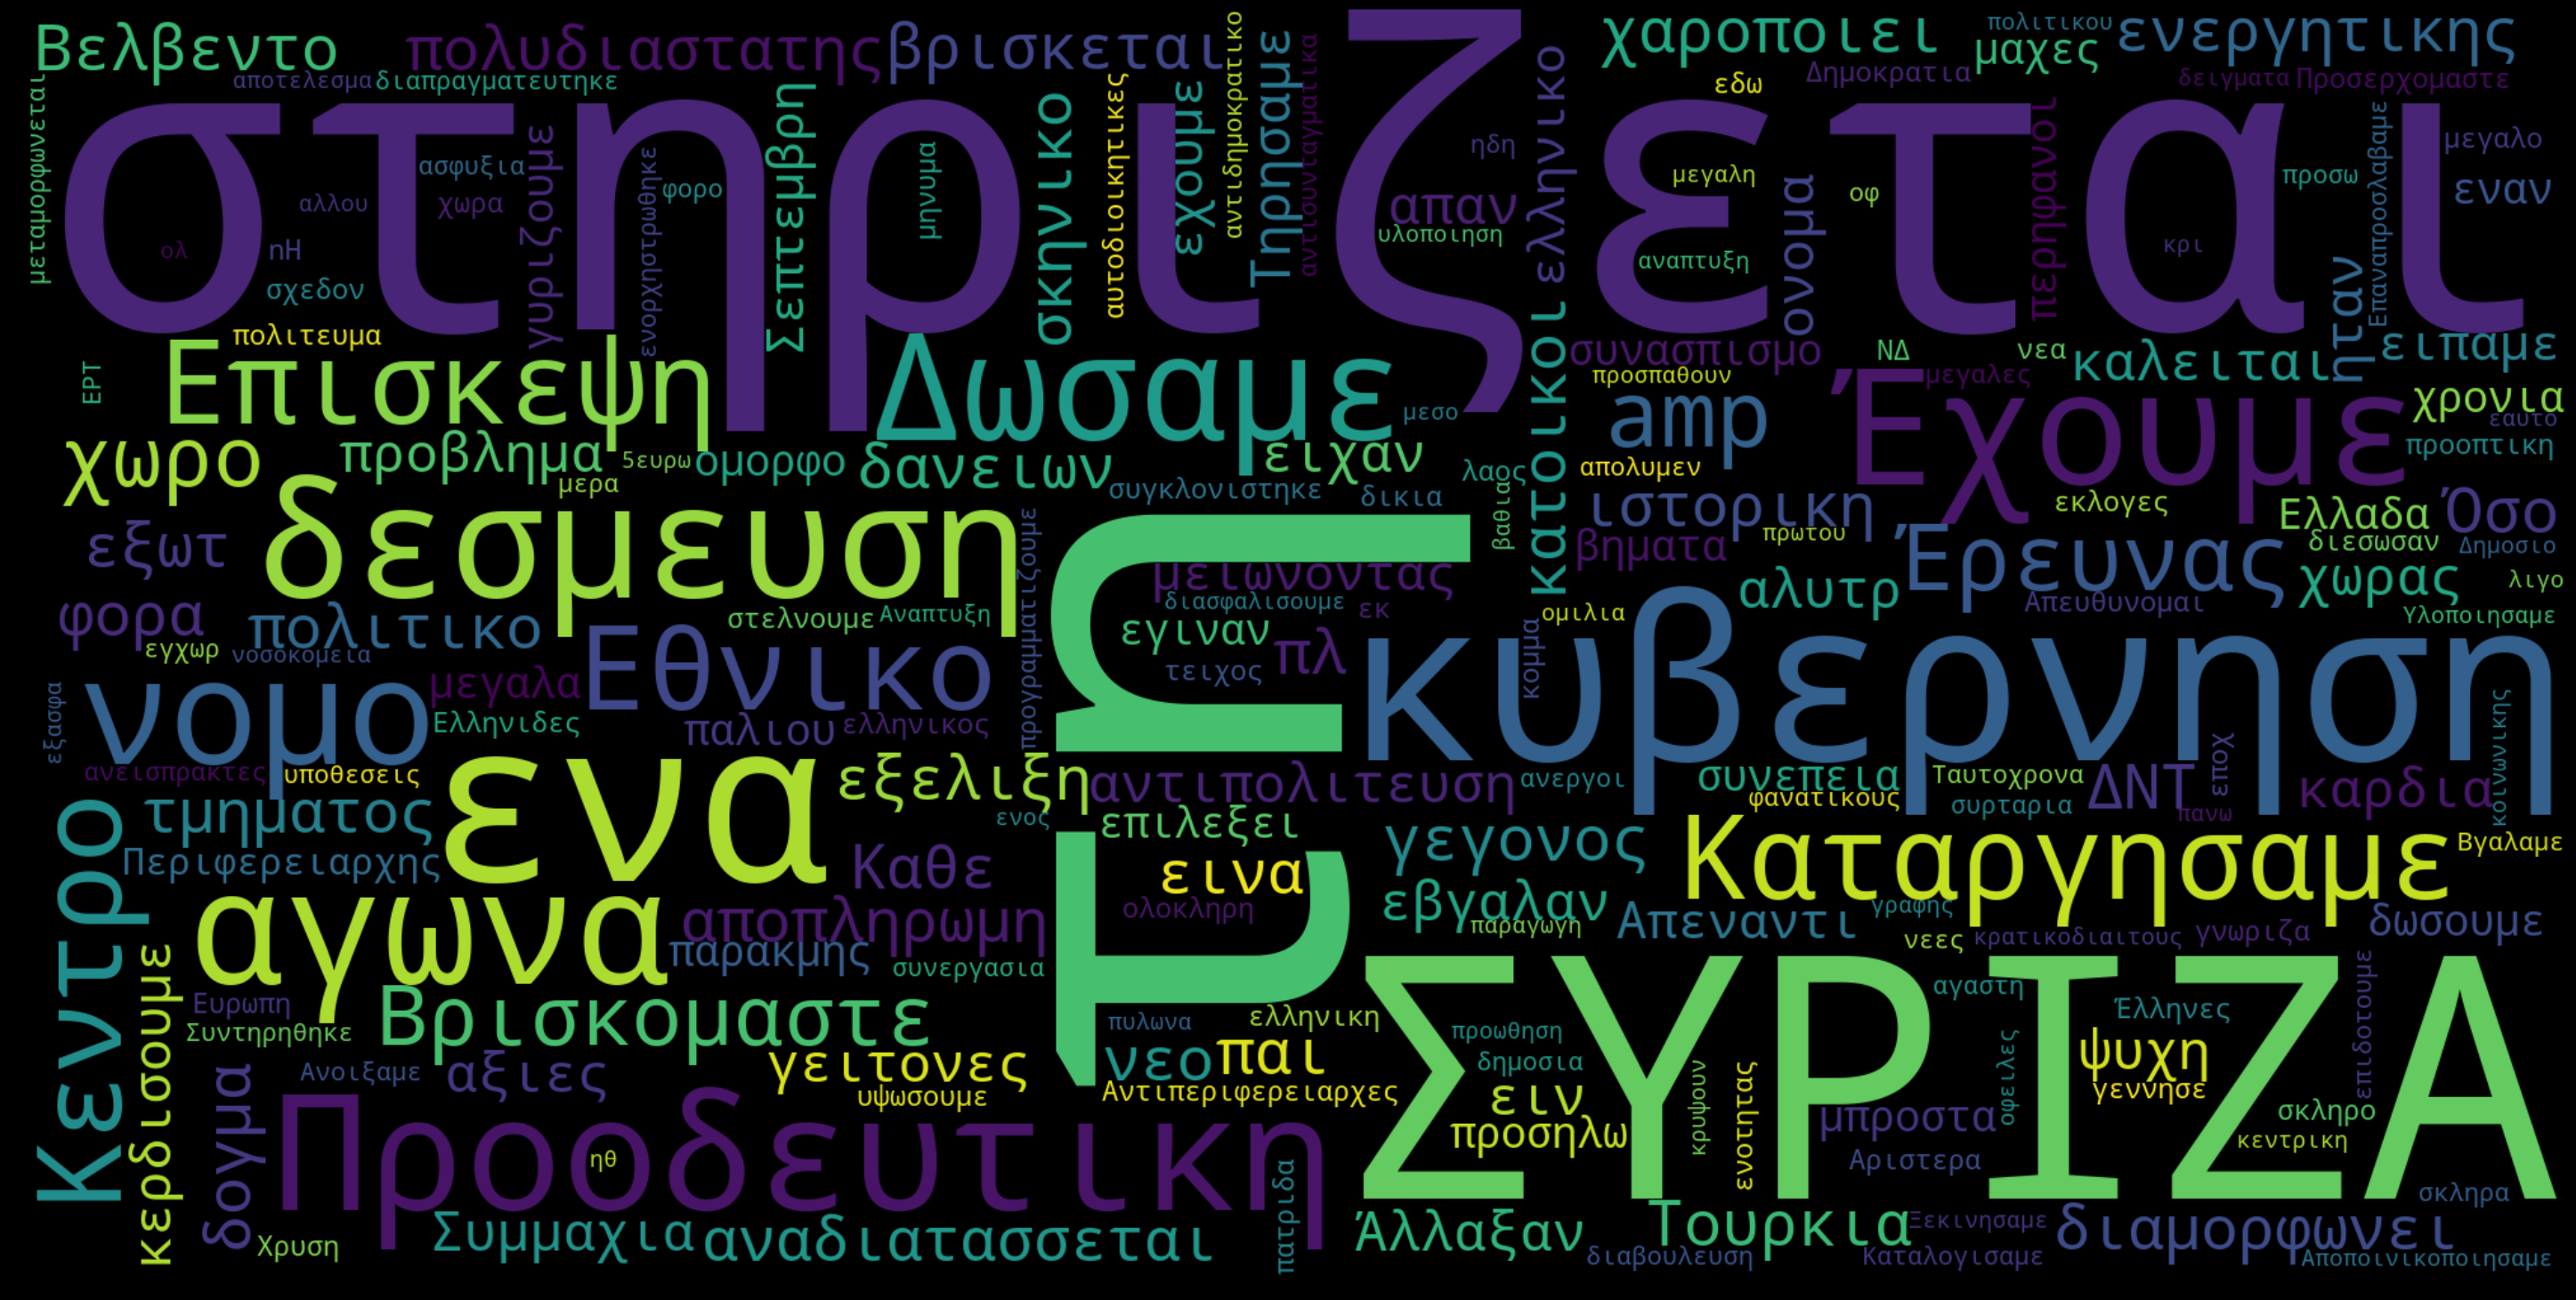

In [0]:
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = stop_words_df['words']).generate(str(text).replace("https",""))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [0]:
import spacy

In [18]:
!python -m spacy download el_core_news_sm

     |████████████████████████████████| 11.4MB 1.2MB/s 
  Created wheel for el-core-news-sm: filename=el_core_news_sm-2.2.5-cp36-none-any.whl size=11422785 sha256=72cd35cb57773d0ad243157055d610b7177ed523952a63bbddd4e97fe4543633
  Stored in directory: /tmp/pip-ephem-wheel-cache-v4jnh2r0/wheels/70/a1/c5/6690d6b524d87e287a8070cf957f834fb1b1665b9ede11348b
Successfully built el-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [0]:
nlp = spacy.load('el_core_news_sm')

In [20]:
short_tweets['text'][1]

"Ένα ευχαριστώ όμως που θα μείνει μόνο στα λόγια, με αφορμή τη σημερινή ημέρα, είναι πολύ λίγο και πολύ υποκριτικό. Είναι υποχρέωση όλων μας και πάνω απ' όλα της κυβέρνησης, να περάσει από τα ωραία λόγια στις πράξεις."

In [0]:
doc = nlp(short_tweets['text'][1])

In [22]:
for token in doc:
    print(token, token.lemma_)

Ένα ένα
ευχαριστώ ευχαριστώ
όμως όμως
που που
θα θα
μείνει μείνω
μόνο μόνο
στα στα
λόγια λόγια
, ,
με με
αφορμή αφορμή
τη τη
σημερινή σημερινός
ημέρα ημέρα
, ,
είναι είναι
πολύ πολύ
λίγο λίγο
και και
πολύ πολύ
υποκριτικό υποκριτικό
. .
Είναι είναι
υποχρέωση υποχρέωση
όλων όλος
μας μας
και και
πάνω πάνω
απ' απ'
όλα όλος
της της
κυβέρνησης κυβέρνηση
, ,
να να
περάσει περάσω
από από
τα τα
ωραία ωραίος
λόγια λόγια
στις στις
πράξεις πράξει
. .


In [0]:
doc = nlp(u'Η Μαρία δεν πήγε στα μαθήματά της ')

In [24]:
for token in doc:
    if token.lemma_ not in nlp.Defaults.stop_words:
      print(token, token.lemma_ )

Μαρία μαρία
πήγε πηγαίνω
μαθήματά μαθήματά


In [25]:
' '.join(token.lemma_ for token in doc)

'η μαρία δεν πηγαίνω στα μαθήματά της'

In [26]:
nlp.Defaults.stop_words

{'άλλα',
 'άλλες',
 'άλλη',
 'άλλην',
 'άλλης',
 'άλλο',
 'άλλοι',
 'άλλον',
 'άλλος',
 'άλλοτε',
 'άλλους',
 'άλλων',
 'άμα',
 'άμεσα',
 'άνευ',
 'άνω',
 'άξαφνα',
 'άρα',
 'άραγε',
 'έγιναν',
 'έγινε',
 'έγκαιρα',
 'έκανε',
 'έκαστα',
 'έκαστες',
 'έκαστη',
 'έκαστην',
 'έκαστης',
 'έκαστο',
 'έκαστοι',
 'έκαστον',
 'έκαστος',
 'ένα',
 'έναν',
 'ένας',
 'έξαφνα',
 'έξι',
 'έξω',
 'έπειτα',
 'έστω',
 'έτερες',
 'έτερη',
 'έτερης',
 'έτερο',
 'έτεροι',
 'έτερον',
 'έτερος',
 'έτερους',
 'έτσι',
 'έχει',
 'έχεις',
 'έχετε',
 'έχομε',
 'έχοντας',
 'έχουμε',
 'έχουν',
 'έχω',
 'έως',
 'ήδη',
 'ήμασταν',
 'ήμαστε',
 'ήμουν',
 'ήσασταν',
 'ήσαστε',
 'ήσουν',
 'ήταν',
 'ήτανε',
 'ήτοι',
 'ήττον',
 'ίδια',
 'ίδιαν',
 'ίδιες',
 'ίδιο',
 'ίδιοι',
 'ίδιον',
 'ίδιος',
 'ίδιοσ',
 'ίδιους',
 'ίδιων',
 'ίσαμε',
 'ίσια',
 'ίσως',
 'αδιάκοπα',
 'αι',
 'ακριβώς',
 'ακόμα',
 'ακόμη',
 'αλλά',
 'αλλαχού',
 'αλλιώς',
 'αλλιώτικα',
 'αλλοιώς',
 'αλλοιώτικα',
 'αλλού',
 'αμέσως',
 'αν',
 'ανά',
 'ανάμεσα',


In [0]:
text = short_tweets['text'].head(100)

In [28]:
text

0     Η προσφορά των νοσηλευτών δεν μπορεί και δεν π...
1     Ένα ευχαριστώ όμως που θα μείνει μόνο στα λόγι...
2     Σήμερα, Παγκόσμια Ημέρα Νοσηλευτή/-τριας, πολλ...
3     Στηρίζουμε τα καταστήματα της γειτονιάς μας κα...
4     Τι θα γινόταν αν η κυβέρνηση ΣΥΡΙΖΑ αντιμετώπι...
                            ...                        
95    Το ερώτημα της Άννας Eλεφάντη είναι το μεγάλο ...
96    Ακολουθεί μέτρα επιδότησης της ανεργίας και όχ...
97    Η κυβέρνηση, όχι μονάχα δεν έχει πάρει προληπτ...
98    Συνομιλώντας με τον Πρόεδρο του ΕΚΑ και εκπροσ...
99    Οι εργαζόμενοι σε κλάδους της οικονομίας που π...
Name: text, Length: 100, dtype: object

In [0]:
doc = nlp(text.str.cat())